In [2]:
!pip install pybaseball


Create for loop to loop over pitches, collect pitch types and spin rates just for years 2020,2021



classifying abnormal spinrates- so when abnormal statcast spinrates detected it warrants an umpired foreign substance checks
slowing pace of the game down with additional checks, show pictures of pitches 
talk about whats legal sunscreen/rosen

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [3]:
# get data for July 15th, 2017
# data = statcast_pitcher('2015-07-15', player_id = 545333) 

In [4]:
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup

# find Chris Sale's player id (mlbam_key)
playerid_lookup('bauer','trevor')

# get all available data
data = statcast_pitcher('2015-04-01', '2021-06-15', player_id = 545333)



Gathering player lookup table. This may take a moment.
Gathering Player Data


<ipython-input-4-b2e22bfab8a6>:8: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  data = statcast_pitcher('2015-04-01', '2021-06-15', player_id = 545333)


In [5]:
playerid_lookup('bauer','trevor')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,bauer,trevor,545333,bauet001,bauertr01,12703,2012.0,2021.0


In [9]:
data.head()#reverse the order by game_date column for plotting

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2020-09-30,93.7,-1.56,5.44,"Bauer, Trevor",663586,545333,strikeout,foul_tip,...,0,0,0,0,0,Standard,Standard,208.0,-0.034,-0.148
1,SL,2020-09-30,79.4,-1.66,5.42,"Bauer, Trevor",663586,545333,NaN,ball,...,0,0,0,0,0,Standard,Standard,48.0,0.000,0.030
2,SL,2020-09-30,78.6,-1.76,5.40,"Bauer, Trevor",663586,545333,NaN,foul,...,0,0,0,0,0,Standard,Standard,47.0,0.000,0.000
3,SL,2020-09-30,77.7,-1.78,5.50,"Bauer, Trevor",663586,545333,NaN,swinging_strike,...,0,0,0,0,0,Standard,Standard,49.0,0.000,-0.044
4,SL,2020-09-30,79.1,-1.61,5.48,"Bauer, Trevor",663586,545333,NaN,ball,...,0,0,0,0,0,Standard,Standard,42.0,0.000,0.020


In [110]:
fastball.dtypes

pitch_type                object
game_date                 object
release_speed            float64
release_pos_x            float64
release_pos_z            float64
                          ...   
if_fielding_alignment     object
of_fielding_alignment     object
spin_axis                float64
delta_home_win_exp       float64
delta_run_exp            float64
Length: 92, dtype: object

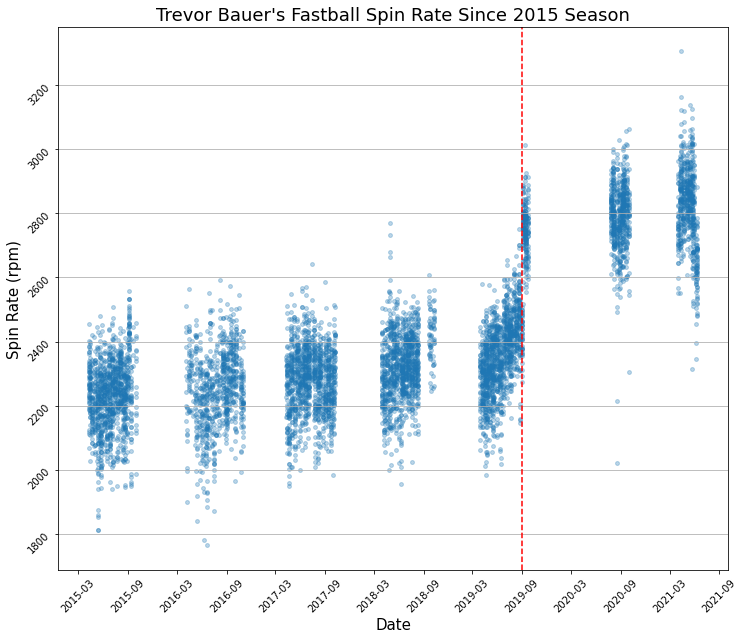

In [185]:
#data in plot, filter by pitch type (fastball) and remove outliers (bad readings/player mistakes)
fastball = data.loc[(data['pitch_type'] == 'FF') & (data['release_spin_rate'] > 1700)].sort_values(by = 'game_date') #1700 removes outliers
fastball['game_date'] = pd.to_datetime(fastball['game_date'])
fb = fastball[['release_spin_rate']]


#plot spin rate for every fastball Bauer has thrown since 2015
fig, ax = plt.subplots()
ax.scatter(fastball['game_date'], 'release_spin_rate', data=fb, alpha = 0.3, s = 15)

#plot vertical axis line estimating when Bauer started using foreign substance
x = pd.to_datetime('2019-9-01')
ax.axvline(x, color='r', linestyle='--')

#format plot

#plot size
fig.set_figheight(10)
fig.set_figwidth(12)

#axis labels
ax.set_xlabel('Date', fontsize = 15)
ax.tick_params(labelrotation=45)
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set_ylabel('Spin Rate (rpm)', fontsize = 15)

#title and gridlines
ax.set_title("Trevor Bauer's Fastball Spin Rate Since 2015 Season", fontsize = 18)
ax.grid(True, which = 'major', axis = 'y')

#save figure in images folder
plt.savefig("../images/spin_rate_bauer.png", bbox_inches="tight")

In [ ]:
Change X-axis

In [59]:
data['pitch_type'].value_counts()

FF    3770
KC    1861
FC    1478
SL    1418
CH     512
SI     158
FT     154
Name: pitch_type, dtype: int64

In [58]:
data['pitch_type'].value_counts()

FF    3770
KC    1861
FC    1478
SL    1418
CH     512
SI     158
FT     154
Name: pitch_type, dtype: int64

In [17]:
data['zone'].value_counts()

13.0    2865
12.0    2674
14.0    2628
5.0     1565
6.0     1407
8.0     1345
11.0    1122
4.0     1104
9.0     1102
7.0     1025
2.0      937
3.0      826
1.0      582
Name: zone, dtype: int64

In [ ]:
# Visualizing logistic regression probabilities.

plt.figure(figsize = (10, 5))

plt.scatter(X_test, y_test, s = 10);

plt.plot(X_test.sort_values('gpa'),
         lg.predict_proba(X_test.sort_values('gpa'))[:,1],
         color = 'grey', alpha = 0.8, lw = 3)

plt.xlabel('GPA')
plt.ylabel('Admit')
plt.title('Predicting Admission from GPA');